In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4%}'.format

In [ ]:
import riskfolio as rp

In [ ]:
stocks = ['AARTIIND.NS',
 'ANGELONE.NS',
 'BSOFT.NS',
 'CENTURYTEX.NS',
 'CHAMBLFERT.NS',
 'COCHINSHIP.NS',
 'CAMS.NS',
 'DATAPATTNS.NS',
 'EQUITASBNK.NS',
 'GNFC.NS',
 'IEX.NS',
 'MANAPPURAM.NS',
 'NATIONALUM.NS',
 'NAM-INDIA.NS',
 'REDINGTON.NS',
 'RENUKA.NS',
 'TANLA.NS',
 'TATAINVEST.NS',
 'TEJASNET.NS',
 'TITAGARH.NS',
 'TRIDENT.NS',
 'TRITURBINE.NS',
 'UJJIVANSFB.NS',]

In [ ]:
start_date = '2021-01-01'
end_date = '2024-07-01'

df = yf.download(stocks, start=start_date, end=end_date)
df = df.loc[:,('Adj Close', slice(None))]
df.columns = stocks

[*********************100%%**********************]  23 of 23 completed


In [ ]:
ret = df[stocks].pct_change()
ret = ret.dropna(subset=[ret.columns[0]], how='all')
ret

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.7096%,2.4803%,1.8459%,2.0232%,2.0928%,2.1515%,1.7179%,NaN,0.5298%,0.1995%,...,6.0880%,0.5990%,-0.8368%,-1.8928%,2.0979%,-1.1540%,-0.9330%,20.0000%,0.5559%,1.1364%
2021-01-05,4.3017%,2.7102%,5.5555%,-1.2517%,2.2297%,3.1807%,1.2045%,NaN,-1.3175%,0.8630%,...,-1.7003%,-2.6051%,0.0000%,4.3485%,-0.2733%,1.4593%,3.0822%,19.7674%,-0.2457%,-0.4994%
2021-01-06,-3.4886%,-0.3951%,-3.1915%,-1.0374%,-1.9817%,2.0412%,-0.5304%,NaN,0.5340%,-1.6455%,...,1.8378%,0.1146%,5.4852%,4.9993%,-0.1860%,-1.9777%,0.6644%,3.5599%,3.7562%,-0.3764%
2021-01-07,-0.8330%,2.3516%,0.9446%,1.3202%,-0.2393%,-1.6738%,0.1821%,NaN,5.9761%,0.6469%,...,2.1231%,0.5725%,0.4000%,4.9848%,0.5295%,0.1834%,-0.2475%,-9.3750%,-0.1781%,8.3123%
2021-01-08,0.0469%,0.7613%,1.0313%,-1.1342%,-0.1799%,-0.3529%,1.6357%,NaN,-1.1278%,-1.2190%,...,-0.5197%,2.9222%,-2.7888%,-1.1548%,0.0244%,-0.2197%,-2.4814%,0.6897%,5.8264%,-0.9302%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.3318%,-1.3433%,0.5724%,3.0306%,5.0365%,0.9089%,0.5112%,1.5628%,-1.9801%,-1.2433%,...,-2.0621%,0.1155%,-3.1183%,0.6957%,2.1691%,0.3287%,1.7123%,-0.1813%,-2.1193%,-5.2316%
2024-06-25,-1.5228%,-0.7778%,1.5323%,0.7781%,-1.6828%,-2.8938%,2.1184%,-0.7001%,1.1223%,-1.7399%,...,-0.7948%,0.0969%,2.9788%,-0.0211%,-0.9946%,-0.5601%,0.5187%,-0.6746%,1.8157%,-1.3092%
2024-06-26,-0.0935%,1.5893%,-1.4517%,-0.9675%,-0.8471%,2.7334%,0.8956%,0.4106%,-0.2702%,-0.0432%,...,-0.8330%,-1.3872%,-2.0967%,-0.0686%,-1.1450%,-1.2186%,9.0134%,1.0711%,3.4327%,-2.9626%


In [ ]:
df_filled = ret.fillna(method='ffill')
df_filled

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.7096%,2.4803%,1.8459%,2.0232%,2.0928%,2.1515%,1.7179%,NaN,0.5298%,0.1995%,...,6.0880%,0.5990%,-0.8368%,-1.8928%,2.0979%,-1.1540%,-0.9330%,20.0000%,0.5559%,1.1364%
2021-01-05,4.3017%,2.7102%,5.5555%,-1.2517%,2.2297%,3.1807%,1.2045%,NaN,-1.3175%,0.8630%,...,-1.7003%,-2.6051%,0.0000%,4.3485%,-0.2733%,1.4593%,3.0822%,19.7674%,-0.2457%,-0.4994%
2021-01-06,-3.4886%,-0.3951%,-3.1915%,-1.0374%,-1.9817%,2.0412%,-0.5304%,NaN,0.5340%,-1.6455%,...,1.8378%,0.1146%,5.4852%,4.9993%,-0.1860%,-1.9777%,0.6644%,3.5599%,3.7562%,-0.3764%
2021-01-07,-0.8330%,2.3516%,0.9446%,1.3202%,-0.2393%,-1.6738%,0.1821%,NaN,5.9761%,0.6469%,...,2.1231%,0.5725%,0.4000%,4.9848%,0.5295%,0.1834%,-0.2475%,-9.3750%,-0.1781%,8.3123%
2021-01-08,0.0469%,0.7613%,1.0313%,-1.1342%,-0.1799%,-0.3529%,1.6357%,NaN,-1.1278%,-1.2190%,...,-0.5197%,2.9222%,-2.7888%,-1.1548%,0.0244%,-0.2197%,-2.4814%,0.6897%,5.8264%,-0.9302%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.3318%,-1.3433%,0.5724%,3.0306%,5.0365%,0.9089%,0.5112%,1.5628%,-1.9801%,-1.2433%,...,-2.0621%,0.1155%,-3.1183%,0.6957%,2.1691%,0.3287%,1.7123%,-0.1813%,-2.1193%,-5.2316%
2024-06-25,-1.5228%,-0.7778%,1.5323%,0.7781%,-1.6828%,-2.8938%,2.1184%,-0.7001%,1.1223%,-1.7399%,...,-0.7948%,0.0969%,2.9788%,-0.0211%,-0.9946%,-0.5601%,0.5187%,-0.6746%,1.8157%,-1.3092%
2024-06-26,-0.0935%,1.5893%,-1.4517%,-0.9675%,-0.8471%,2.7334%,0.8956%,0.4106%,-0.2702%,-0.0432%,...,-0.8330%,-1.3872%,-2.0967%,-0.0686%,-1.1450%,-1.2186%,9.0134%,1.0711%,3.4327%,-2.9626%


In [ ]:
df_1 = df_filled.fillna(method='bfill')
df_1

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.7096%,2.4803%,1.8459%,2.0232%,2.0928%,2.1515%,1.7179%,-6.5232%,0.5298%,0.1995%,...,6.0880%,0.5990%,-0.8368%,-1.8928%,2.0979%,-1.1540%,-0.9330%,20.0000%,0.5559%,1.1364%
2021-01-05,4.3017%,2.7102%,5.5555%,-1.2517%,2.2297%,3.1807%,1.2045%,-6.5232%,-1.3175%,0.8630%,...,-1.7003%,-2.6051%,0.0000%,4.3485%,-0.2733%,1.4593%,3.0822%,19.7674%,-0.2457%,-0.4994%
2021-01-06,-3.4886%,-0.3951%,-3.1915%,-1.0374%,-1.9817%,2.0412%,-0.5304%,-6.5232%,0.5340%,-1.6455%,...,1.8378%,0.1146%,5.4852%,4.9993%,-0.1860%,-1.9777%,0.6644%,3.5599%,3.7562%,-0.3764%
2021-01-07,-0.8330%,2.3516%,0.9446%,1.3202%,-0.2393%,-1.6738%,0.1821%,-6.5232%,5.9761%,0.6469%,...,2.1231%,0.5725%,0.4000%,4.9848%,0.5295%,0.1834%,-0.2475%,-9.3750%,-0.1781%,8.3123%
2021-01-08,0.0469%,0.7613%,1.0313%,-1.1342%,-0.1799%,-0.3529%,1.6357%,-6.5232%,-1.1278%,-1.2190%,...,-0.5197%,2.9222%,-2.7888%,-1.1548%,0.0244%,-0.2197%,-2.4814%,0.6897%,5.8264%,-0.9302%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.3318%,-1.3433%,0.5724%,3.0306%,5.0365%,0.9089%,0.5112%,1.5628%,-1.9801%,-1.2433%,...,-2.0621%,0.1155%,-3.1183%,0.6957%,2.1691%,0.3287%,1.7123%,-0.1813%,-2.1193%,-5.2316%
2024-06-25,-1.5228%,-0.7778%,1.5323%,0.7781%,-1.6828%,-2.8938%,2.1184%,-0.7001%,1.1223%,-1.7399%,...,-0.7948%,0.0969%,2.9788%,-0.0211%,-0.9946%,-0.5601%,0.5187%,-0.6746%,1.8157%,-1.3092%
2024-06-26,-0.0935%,1.5893%,-1.4517%,-0.9675%,-0.8471%,2.7334%,0.8956%,0.4106%,-0.2702%,-0.0432%,...,-0.8330%,-1.3872%,-2.0967%,-0.0686%,-1.1450%,-1.2186%,9.0134%,1.0711%,3.4327%,-2.9626%


In [ ]:
## Mean Variance Portfolios

In [ ]:
### Maximising Sharpe Ratio

In [ ]:
port = rp.Portfolio(returns=df_1)

method_mu='hist'
method_cov='hist'

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

model='Classic'
rm = 'MV'
obj = 'Sharpe'
hist = True
rf = 0
l = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
weights,0.0000%,4.3750%,0.0000%,0.0000%,6.2697%,0.0000%,18.6304%,0.0000%,0.0000%,0.0000%,...,0.0000%,6.0551%,0.0000%,0.0000%,17.0381%,9.6615%,23.6581%,0.0000%,14.3120%,0.0000%


In [ ]:
## Portfolio composition

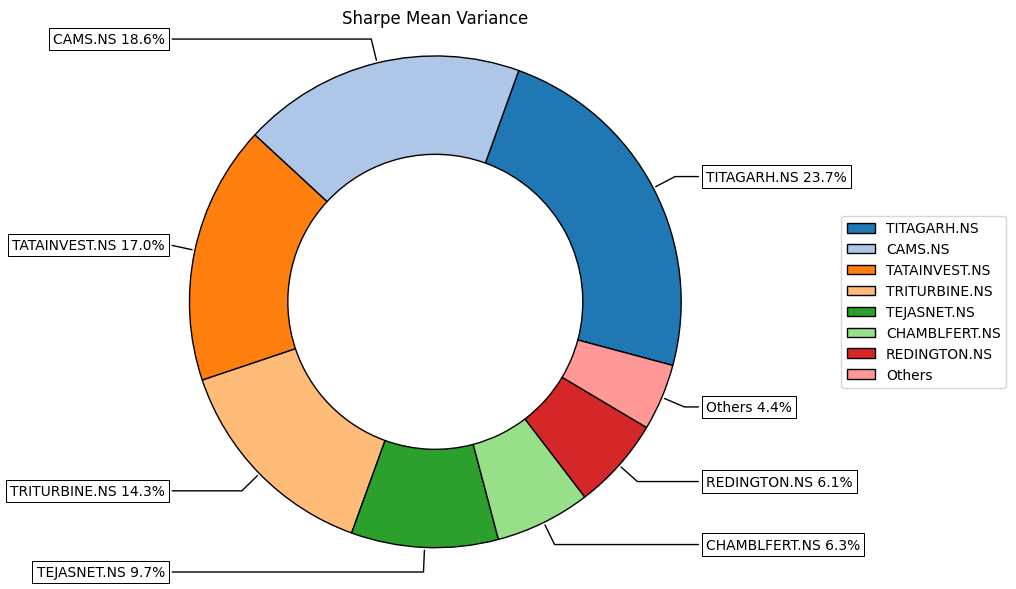

In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
import pandas as pd

w_df = w

# Convert weights from proportions to percentages
w_df_percentage = w_df * 100

# Filter stocks with weights greater than or equal to 3%
filtered_stocks = w_df_percentage[w_df_percentage.iloc[:, 0] >= 1.0]

# Use the apply function to print each ticker and weight
filtered_stocks.apply(lambda x: print(f"{x.name}: {x.values[0]:.2f}%"), axis=1)

ANGELONE.NS: 4.38%
CHAMBLFERT.NS: 6.27%
CAMS.NS: 18.63%
REDINGTON.NS: 6.06%
TATAINVEST.NS: 17.04%
TEJASNET.NS: 9.66%
TITAGARH.NS: 23.66%
TRITURBINE.NS: 14.31%


,0
ANGELONE.NS,None
CHAMBLFERT.NS,None
CAMS.NS,None
REDINGTON.NS,None
TATAINVEST.NS,None
TEJASNET.NS,None
TITAGARH.NS,None
TRITURBINE.NS,None


In [ ]:
## Calculate efficient frontier


In [ ]:
points = 50

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
0,9.7204%,0.0000%,7.1729%,18.5087%,1.2425%,2.7017%,2.3288%,3.6987%,12.1781%,1.6825%,...,0.0000%,8.5985%,0.0000%,1.6738%,8.5923%,0.0000%,0.0000%,2.4156%,6.0405%,0.0000%
1,1.6674%,0.0000%,6.9972%,16.2235%,3.2254%,1.4875%,7.1008%,0.0000%,10.8210%,2.9688%,...,0.0000%,9.1627%,0.0000%,0.0000%,12.1134%,2.4547%,4.9894%,2.5034%,8.2219%,0.0000%
2,0.0000%,0.0000%,6.1420%,14.1989%,4.2889%,0.2958%,9.1596%,0.0000%,9.6050%,3.1109%,...,0.0000%,9.1271%,0.0000%,0.0000%,13.3222%,3.8466%,8.2016%,2.4365%,9.4536%,0.0000%
3,0.0000%,0.3872%,5.0786%,12.2848%,5.0091%,0.0000%,10.7405%,0.0000%,8.3791%,2.6454%,...,0.0000%,8.8964%,0.0000%,0.0000%,14.0909%,4.8330%,10.6985%,2.2288%,10.3910%,0.0000%
4,0.0000%,1.0628%,4.1518%,10.6755%,5.5406%,0.0000%,12.0291%,0.0000%,7.3275%,2.1534%,...,0.0000%,8.6696%,0.0000%,0.0000%,14.6856%,5.6031%,12.7058%,2.0136%,11.1216%,0.0000%


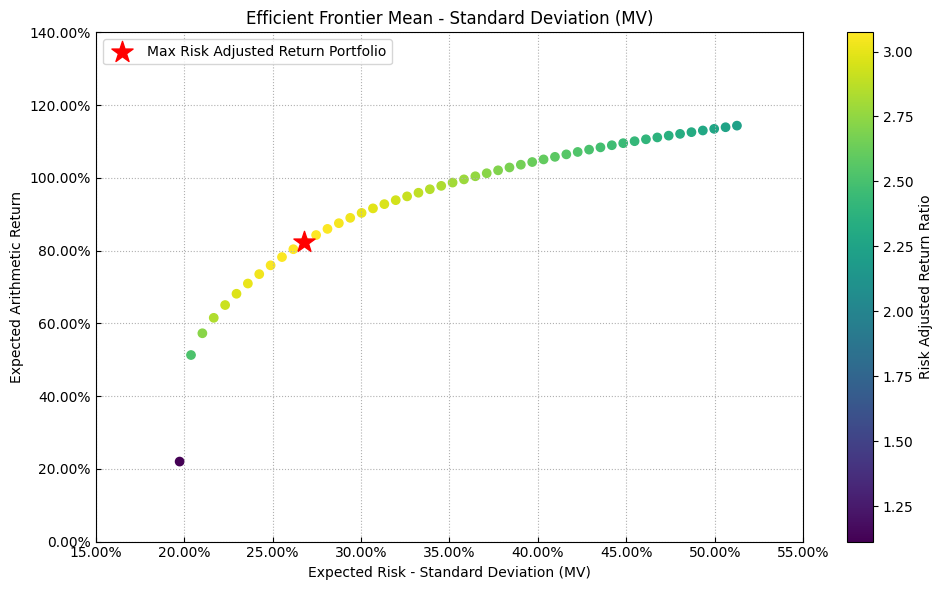

In [ ]:
label = 'Max Risk Adjusted Return Portfolio'

# Expected returns
mu = port.mu

# Covariance matrix
cov = port.cov

# Returns of stocks
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

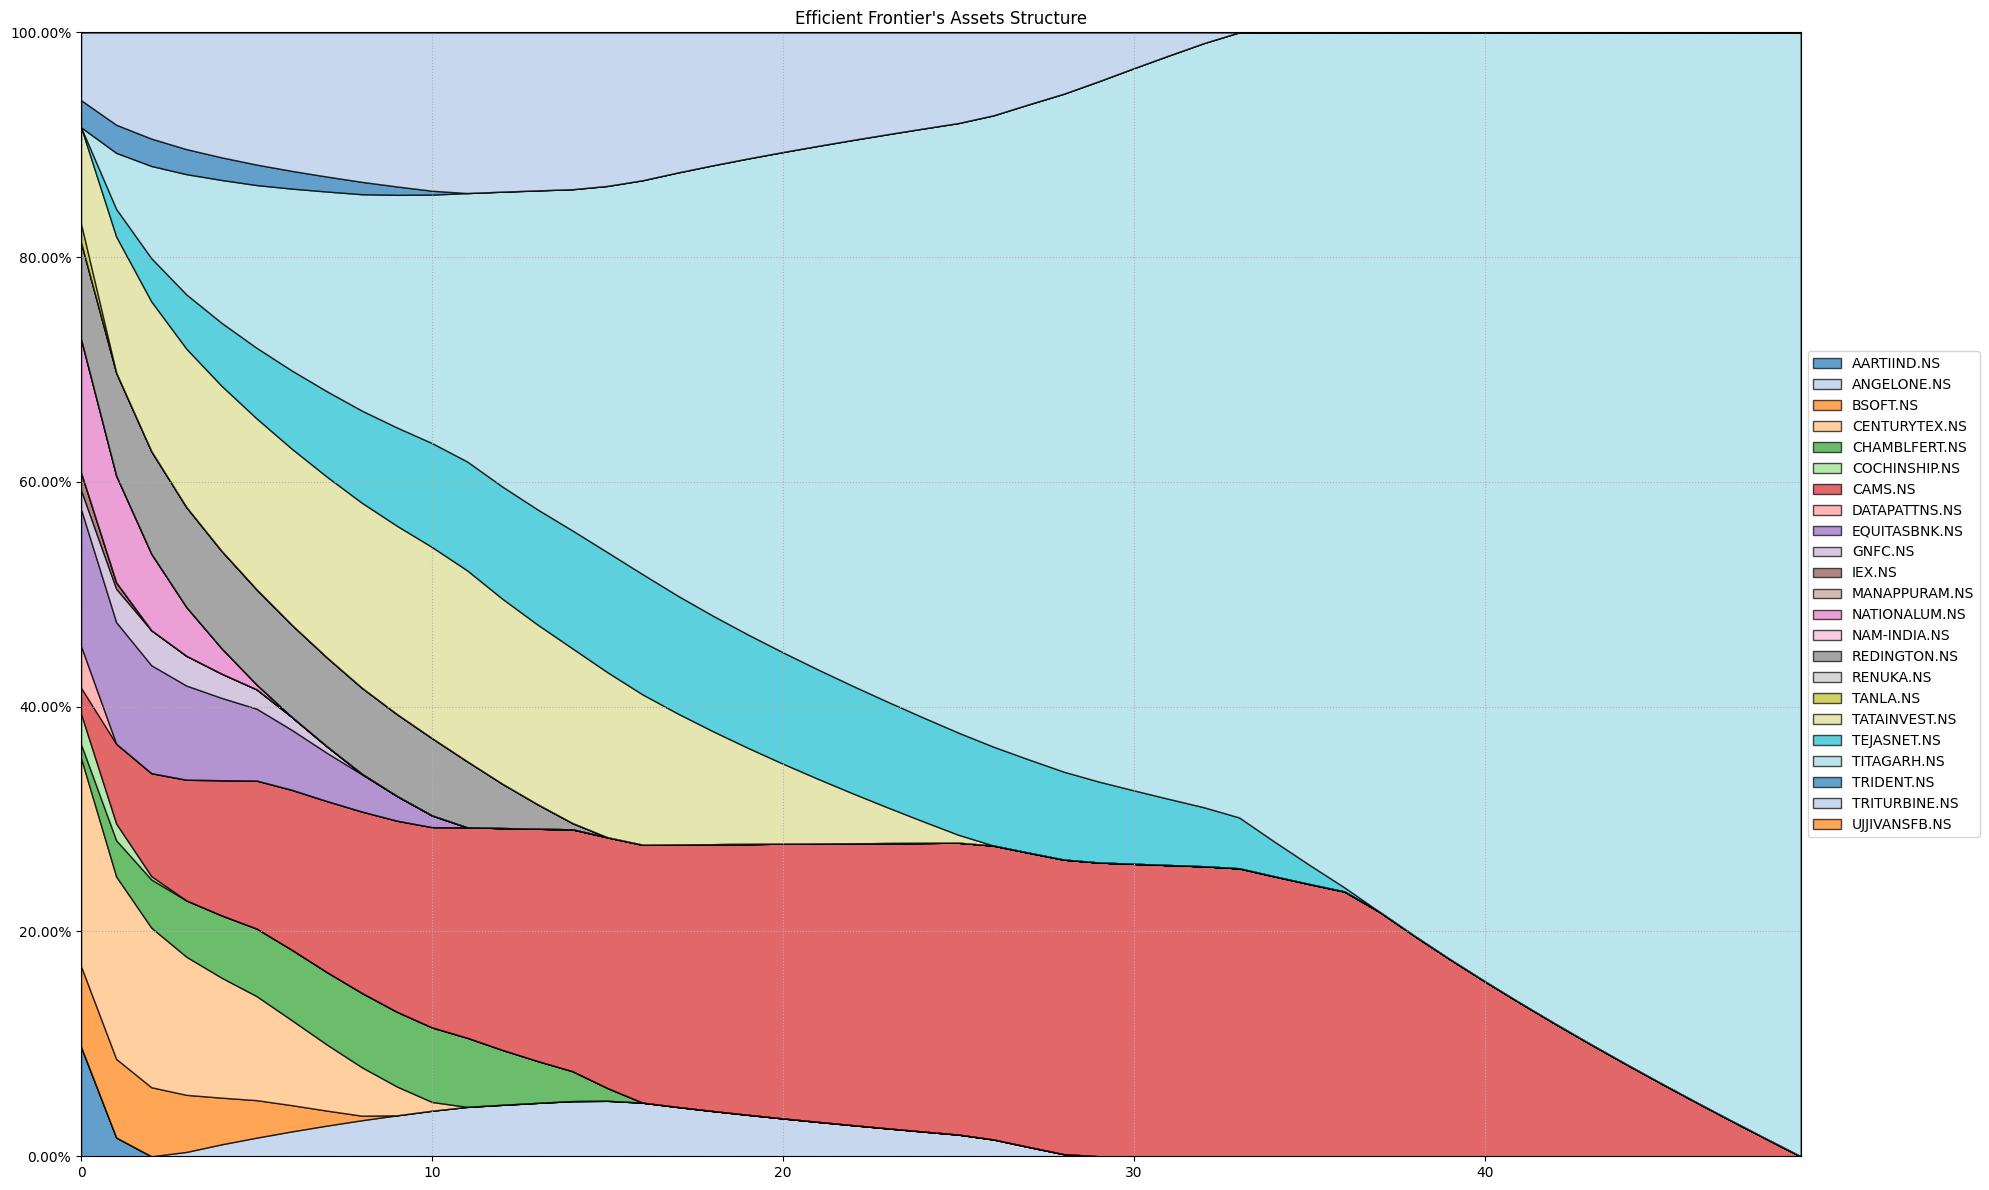

In [ ]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=12, width=20, ax=None)

In [ ]:
## Estimating Mean Risk Portfolios

In [ ]:
## Maximizing Return/CVaR ratio

In [ ]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,22.5503%,0.0000%,0.0000%,0.0000%,...,0.0000%,2.5010%,0.0000%,0.0000%,23.4483%,1.6965%,33.0153%,0.0000%,16.7885%,0.0000%


In [ ]:
## Portfolio Pie Chart

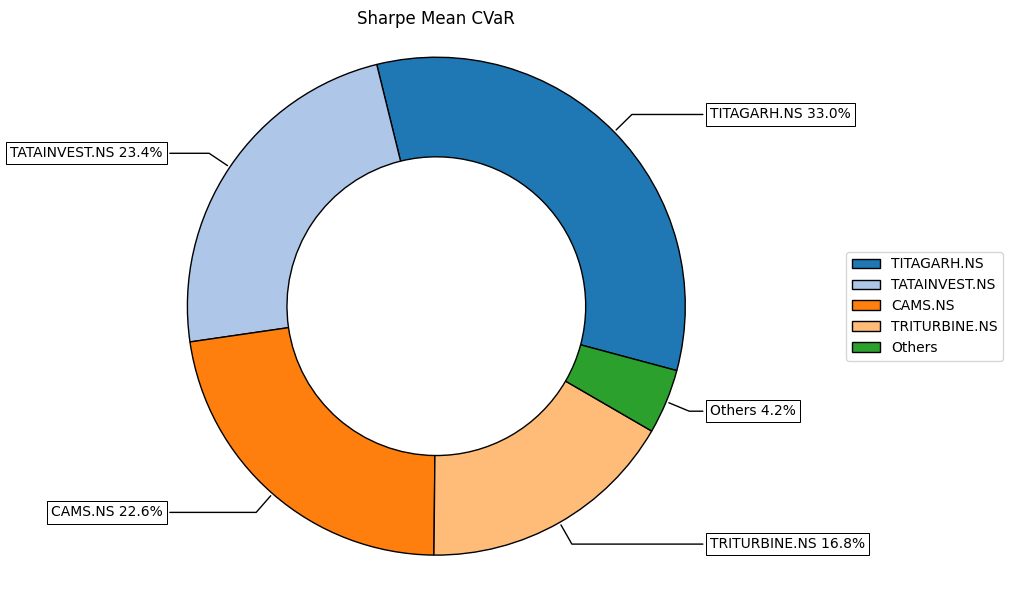

In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
## Calculating efficient frontiers

In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
0,12.2849%,0.0000%,8.5930%,26.8365%,0.0000%,0.0000%,0.0000%,0.0000%,14.2002%,1.0385%,...,0.0000%,11.4521%,0.0000%,0.0000%,7.4196%,0.0000%,0.0000%,3.3680%,6.6081%,0.0000%
1,2.3764%,0.0000%,9.4899%,23.8254%,0.0000%,0.0000%,2.7427%,0.0000%,10.2230%,0.0327%,...,0.0000%,10.0905%,0.0000%,0.0000%,20.9636%,0.0000%,2.0634%,2.3129%,10.2430%,0.0000%
2,0.0000%,0.0000%,5.9124%,24.5036%,0.0000%,0.0000%,5.7367%,0.0000%,8.5585%,0.0000%,...,0.0000%,11.7057%,0.0000%,0.0000%,21.9212%,0.0000%,4.2701%,3.0033%,10.1469%,0.0000%
3,0.0000%,0.0000%,3.0149%,25.0465%,0.0000%,0.0000%,8.2993%,0.0000%,5.3900%,0.0000%,...,0.0000%,12.0783%,0.0000%,0.0000%,23.6686%,0.0000%,5.3020%,3.9170%,11.5566%,0.0000%
4,0.0000%,0.0000%,2.5891%,24.6553%,0.0000%,0.0000%,9.6225%,0.0000%,4.9422%,0.0000%,...,0.0000%,12.8789%,0.0000%,0.0000%,23.6984%,0.0000%,9.0888%,1.4009%,10.2311%,0.0000%


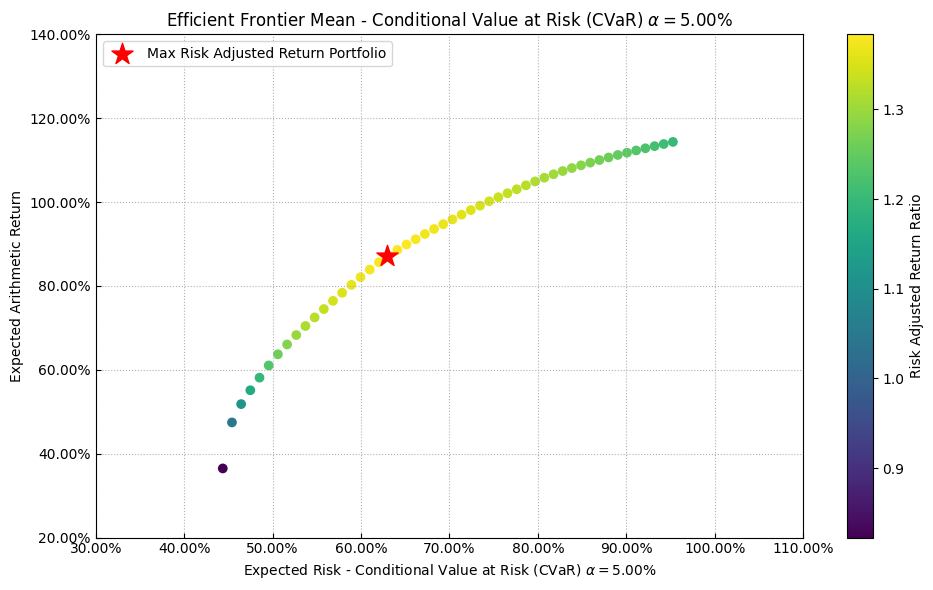

In [ ]:
label = 'Max Risk Adjusted Return Portfolio'

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

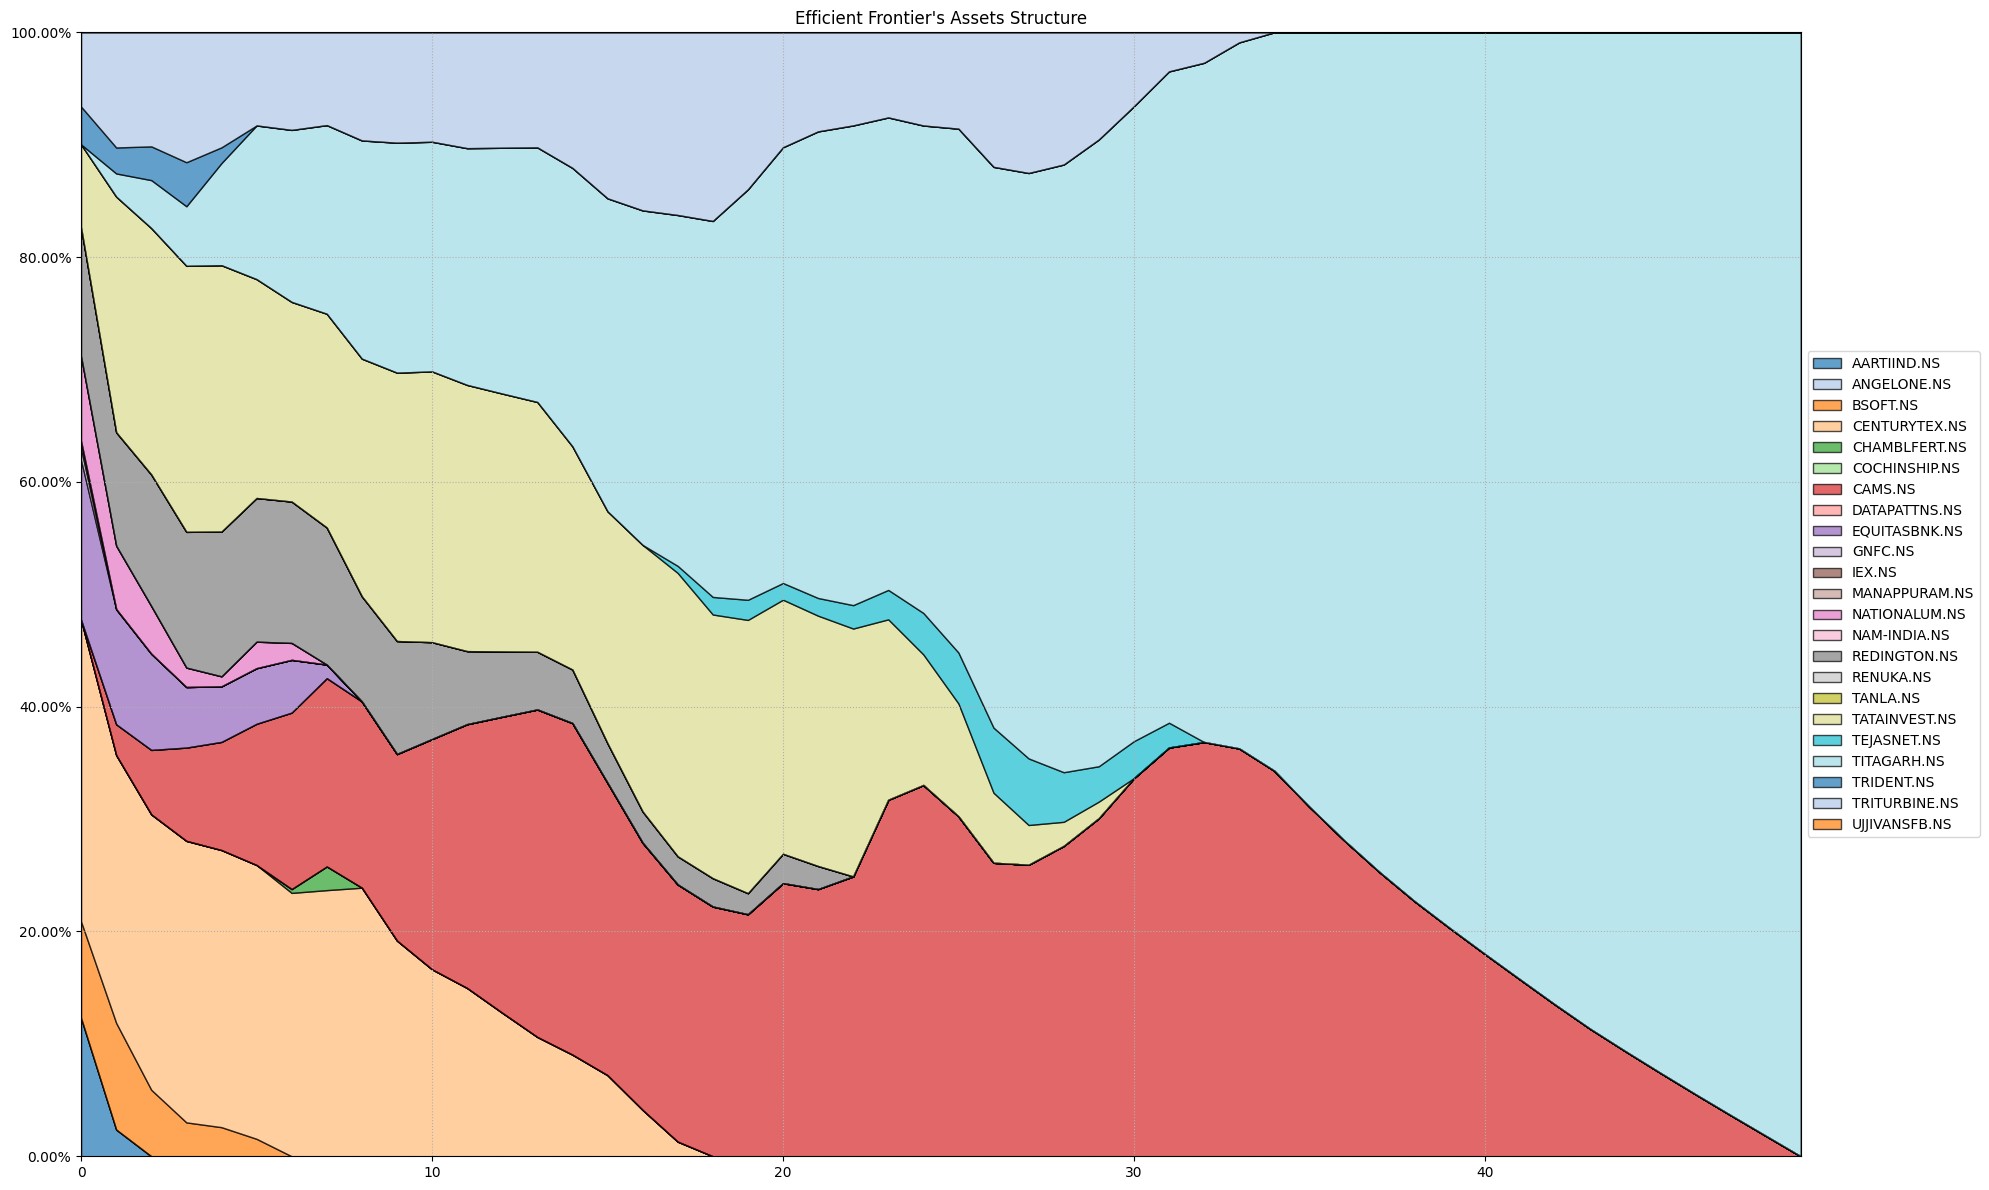

In [ ]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=12, width=20, ax=None)

In [ ]:
# Making optimal portfolio with risk measures

In [ ]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AARTIIND.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ANGELONE.NS,4.38%,3.48%,2.31%,3.78%,1.51%,0.00%,0.00%,0.00%,0.00%,0.15%,0.00%,0.00%,0.00%
BSOFT.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.10%,0.00%,0.97%,0.00%
CENTURYTEX.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CHAMBLFERT.NS,6.27%,5.32%,0.00%,2.35%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
COCHINSHIP.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CAMS.NS,18.63%,21.01%,24.61%,21.63%,25.05%,22.55%,13.58%,7.43%,53.64%,8.20%,30.85%,14.80%,33.76%
DATAPATTNS.NS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
EQUITASBNK.NS,0.00%,0.29%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
GNFC.NS,0.00%,0.63%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.05%,9.34%,8.29%,7.91%,12.42%


<Axes: >

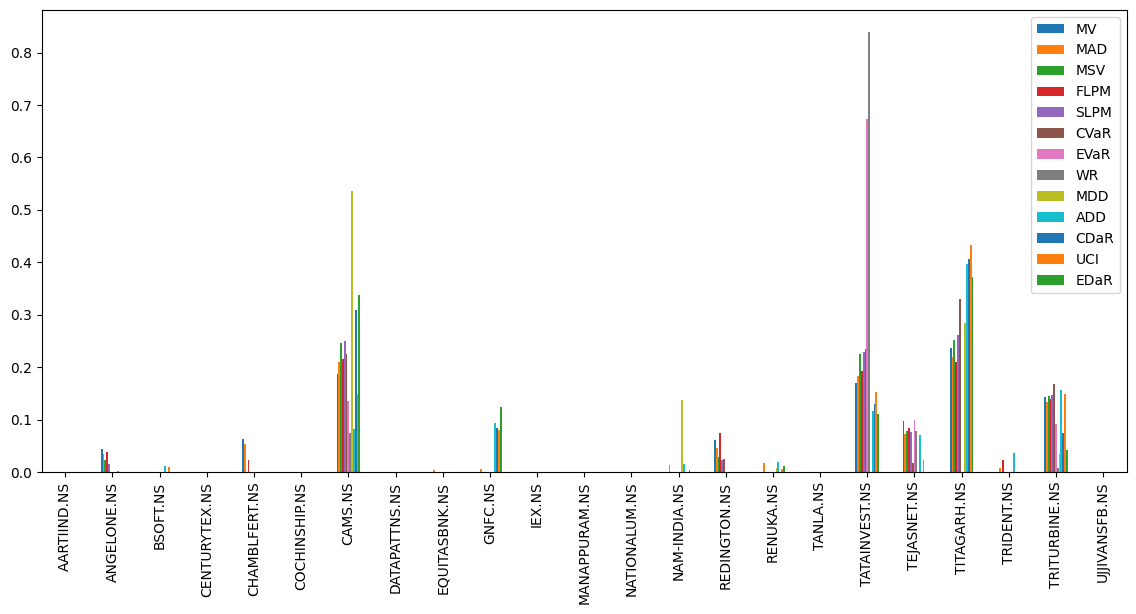

In [ ]:
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [ ]:
## Building constraints on assets

In [ ]:
asset_classes = {
    'Stocks': ['AARTIIND.NS', 'ANGELONE.NS', 'BSOFT.NS', 'CENTURYTEX.NS', 'CHAMBLFERT.NS',
               'COCHINSHIP.NS', 'CAMS.NS', 'DATAPATTNS.NS', 'EQUITASBNK.NS', 'GNFC.NS',
               'IEX.NS', 'MANAPPURAM.NS', 'NATIONALUM.NS', 'NAM-INDIA.NS', 'REDINGTON.NS',
               'RENUKA.NS', 'TANLA.NS', 'TATAINVEST.NS', 'TEJASNET.NS', 'TITAGARH.NS',
               'TRIDENT.NS', 'TRITURBINE.NS', 'UJJIVANSFB.NS'],
    'Industry': ['Chemicals', 'Financial Services', 'Information Technology', 'Textiles',
                 'Chemicals', 'Shipping', 'Financial Services', 'Information Technology',
                 'Banking', 'Chemicals', 'Utilities', 'Financial Services',
                 'Metals & Mining', 'Financial Services', 'Distribution', 'Agriculture',
                 'Information Technology', 'Financial Services', 'Information Technology',
                 'Engineering', 'Textiles', 'Power Generation', 'Banking']
}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Stocks'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


In [ ]:
A, B = rp.assets_constraints(constraints, asset_classes)

In [ ]:
# Optimising portfolio with constraints

In [ ]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AARTIIND.NS,ANGELONE.NS,BSOFT.NS,CENTURYTEX.NS,CHAMBLFERT.NS,COCHINSHIP.NS,CAMS.NS,DATAPATTNS.NS,EQUITASBNK.NS,GNFC.NS,...,NAM-INDIA.NS,REDINGTON.NS,RENUKA.NS,TANLA.NS,TATAINVEST.NS,TEJASNET.NS,TITAGARH.NS,TRIDENT.NS,TRITURBINE.NS,UJJIVANSFB.NS
weights,0.0000%,6.8851%,2.4953%,5.8331%,9.9999%,0.0000%,10.0000%,0.0000%,5.6976%,3.0542%,...,2.8265%,9.9999%,0.0124%,0.0000%,10.0000%,10.0000%,10.0000%,3.1959%,10.0000%,0.0000%


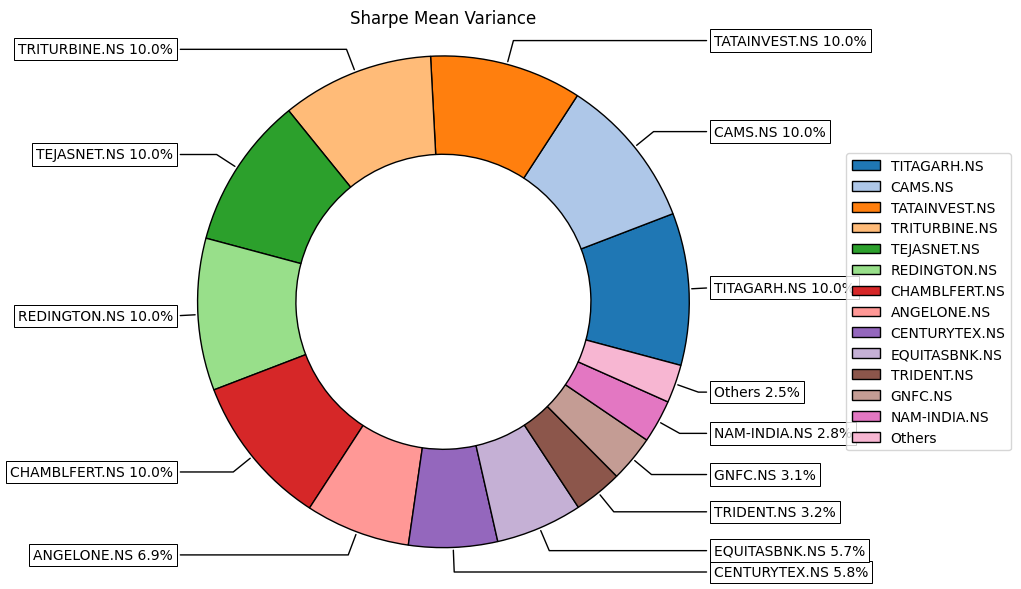

In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
w_classes = pd.concat([asset_classes.set_index('Stocks'), w], axis=1)

display(w_classes)

,Industry,weights
AARTIIND.NS,Chemicals,0.0000%
ANGELONE.NS,Financial Services,6.8851%
BSOFT.NS,Information Technology,2.4953%
CAMS.NS,Financial Services,10.0000%
CENTURYTEX.NS,Textiles,5.8331%
CHAMBLFERT.NS,Chemicals,9.9999%
COCHINSHIP.NS,Shipping,0.0000%
DATAPATTNS.NS,Information Technology,0.0000%
EQUITASBNK.NS,Banking,5.6976%
GNFC.NS,Chemicals,3.0542%


In [ ]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Agriculture,0.0124%
Banking,5.6976%
Chemicals,13.0541%
Distribution,9.9999%
Engineering,10.0000%
Financial Services,29.7115%
Information Technology,12.4953%
Metals & Mining,0.0000%
Power Generation,10.0000%


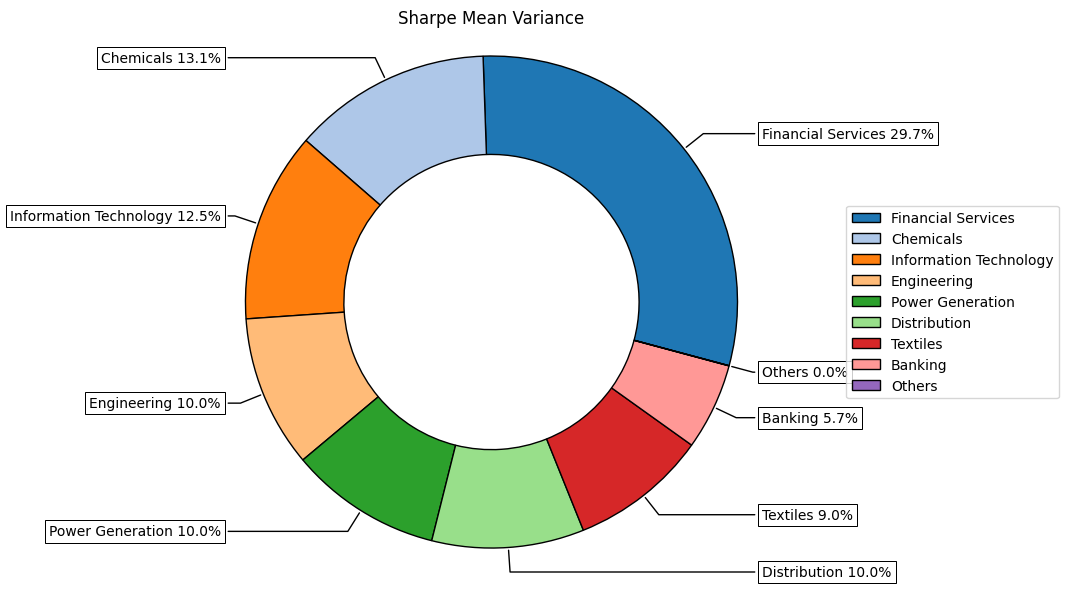

In [ ]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [ ]:
# Portfolio comparission with Nifty(Benchmark)

In [102]:
nifty50 = '^NSEI'

In [104]:
# Define the date range
start_date = '2021-01-01'
end_date = '2024-07-01'

In [105]:
# Convert weights to decimal
weights = {k: v / 100 for k, v in w_classes.items()}

In [106]:
# Fetch historical data
def fetch_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data['Adj Close']

In [107]:
# Create a DataFrame for stock data
stock_data = pd.DataFrame()

for stock in stocks:
    try:
        stock_data[stock] = fetch_data(stock, start_date, end_date)
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [108]:
# Aligning weights with stocks
aligned_weights = {k: weights[k] for k in stock_data.columns if k in weights}

In [109]:
# Calculating returns
def calculate_returns(data):
    return data.pct_change().dropna()

stock_returns = calculate_returns(stock_data)
nifty_returns = calculate_returns(fetch_data(nifty50, start_date, end_date))

[*********************100%%**********************]  1 of 1 completed


In [110]:
weights_series = pd.Series(aligned_weights)

In [111]:
# Calculating weighted portfolio returns
portfolio_returns = stock_returns.dot(weights_series)

In [112]:
# Cumulative returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_nifty_returns = (1 + nifty_returns).cumprod() - 1

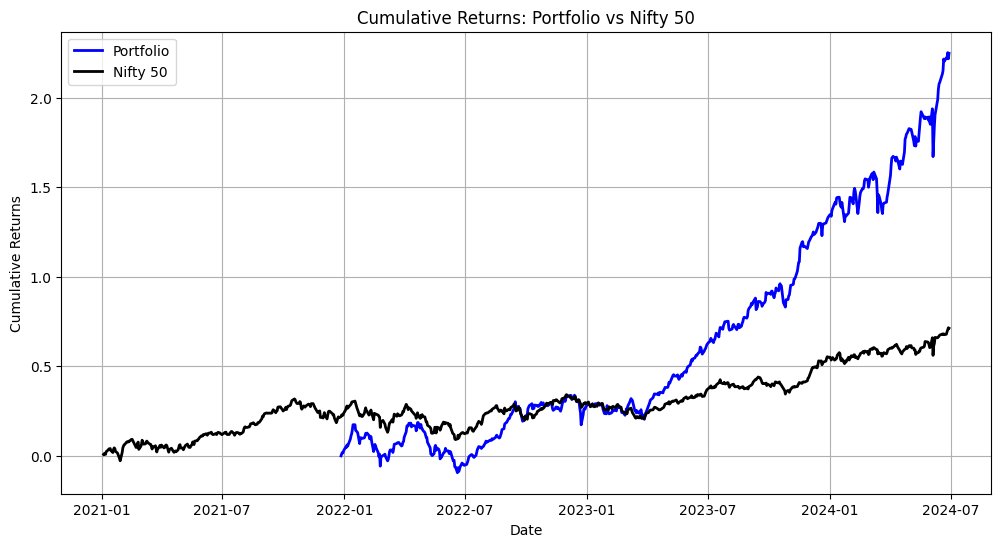

In [113]:
# Plotting cumulative returns
plt.figure(figsize=(12, 6))

# Plotting cumulative portfolio returns
plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns, label='Portfolio', color='blue', linewidth=2)

# Plotting cumulative Nifty 50 returns
plt.plot(cumulative_nifty_returns.index, cumulative_nifty_returns, label='Nifty 50', color='black', linewidth=2)

plt.title('Cumulative Returns: Portfolio vs Nifty 50')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
# Percentage returns
def calculate_percentage_return(cumulative_returns):
    return (cumulative_returns[-1] + 1) * 100 - 100

percentage_return_portfolio = calculate_percentage_return(cumulative_portfolio_returns)
percentage_return_nifty = calculate_percentage_return(cumulative_nifty_returns)

print(f"Percentage Return of Portfolio: {percentage_return_portfolio:.2f}%")
print(f"Percentage Return of Nifty 50: {percentage_return_nifty:.2f}%")

Percentage Return of Portfolio: 224.74%
Percentage Return of Nifty 50: 71.28%
